In [1]:
#Package for:
#downnload data 
from __future__ import print_function
import requests
import xml.etree.ElementTree as ET
from pathlib import Path

#processing data 
import numpy as np
import pandas as pd
import xarray as xr

#plotting
from matplotlib import pyplot as plt
import cartopy.crs as crs
import cartopy
import time

%matplotlib inline
%config InlineBackend.figure_format = 'retina' 



In [2]:


def esgf_search(server="https://esgf.ceda.ac.uk/esg-search/search",
                files_type="OPENDAP", local_node=True, project="CMIP6",
                verbose=False, format="application%2Fsolr%2Bjson",
                use_csrf=False, **search):
                    
    client = requests.session()
    payload = search
    payload["project"] = project
    payload["type"]= "File"
    if local_node:
        payload["distrib"] = "false"
    if use_csrf:
        client.get(server)
        if 'csrftoken' in client.cookies:
            # Django 1.6 and up
            csrftoken = client.cookies['csrftoken']

    payload["format"] = format

    offset = 0
    numFound = 10000
    all_files = []
    files_type = files_type.upper()
    while offset < numFound:
        payload["offset"] = offset
        url_keys = [] 
        for k in payload:
            url_keys += ["{}={}".format(k, payload[k])]

        url = "{}/?{}".format(server, "&".join(url_keys))
        print(url)
        
        r = client.get(url)
        r.raise_for_status()
        resp = r.json()["response"]
        numFound = int(resp["numFound"])
        resp = resp["docs"]
        offset += len(resp)
        for d in resp:
            if verbose:
                for k in d:
                    print("{}: {}".format(k,d[k]))
            url = d["url"]
            for f in d["url"]:
                sp = f.split("|")
                if sp[-1] == files_type:
                    all_files.append(sp[0].split(".html")[0])
    return sorted(all_files)

In [6]:

models = {
    #"HadGEM3-GC31-HM": {"activity_id": "HighResMIP", "table_id": "Omon", "variable_id": "tos", "experiment_id": "hist-1950", "institution_id": "MOHC", "grid_label": "gn", "member_id": "r1i1p1f1"},
    
    # Uncomment other models as needed
    # "CMCC-CM2-HR4": {"activity_id": "HighResMIP", "table_id": "Omon", "variable_id": "tos", "experiment_id": "highres-future", "institution_id": "CMCC", "grid_label": "gn", "member_id": "r1i1p1f1"},

    # "CMCC-CM2-VHR4": {"activity_id": "HighResMIP", "table_id": "Omon", "variable_id": "tos", "experiment_id": "highres-future", "institution_id": "CMCC", "grid_label": "gn", "member_id": "r1i1p1f1"},

    # "EC-Earth3P-HR": {"activity_id": "HighResMIP", "table_id": "Omon", "variable_id": "tos", "experiment_id": "hist-1950", "institution_id": "EC-Earth-Consortium", "grid_label": "gn", "member_id": "r3i1p2f1"},

    "MPI-ESM1-2-HR": {"activity_id": "HighResMIP", "table_id": "Omon", "variable_id": "tos", "experiment_id": "hist-1950", "institution_id": "EC-Earth-Consortium", "grid_label": "gn", "member_id": "r1i1p1f1"},

    
   }


 result = esgf_search(
            activity_id=model_info["activity_id"],
            table_id=model_info["table_id"],
            variable_id=model_info["variable_id"],
            experiment_id=model_info["experiment_id"],
            institution_id=model_info["institution_id"],
            member_id=model_info["member_id"],
            source_id=model,
            grid_label=model_info["grid_label"]
        )
result

https://esgf.ceda.ac.uk/esg-search/search/?activity_id=HighResMIP&table_id=Omon&variable_id=tos&experiment_id=hist-1950&institution_id=EC-Earth-Consortium&source_id=EC-Earth3P-HR&member_id=r2i1p2f1&grid_label=gn&project=CMIP6&type=File&distrib=false&format=application%2Fsolr%2Bjson&offset=0
https://esgf.ceda.ac.uk/esg-search/search/?activity_id=HighResMIP&table_id=Omon&variable_id=tos&experiment_id=hist-1950&institution_id=EC-Earth-Consortium&source_id=EC-Earth3P-HR&member_id=r2i1p2f1&grid_label=gn&project=CMIP6&type=File&distrib=false&format=application%2Fsolr%2Bjson&offset=10
https://esgf.ceda.ac.uk/esg-search/search/?activity_id=HighResMIP&table_id=Omon&variable_id=tos&experiment_id=hist-1950&institution_id=EC-Earth-Consortium&source_id=EC-Earth3P-HR&member_id=r2i1p2f1&grid_label=gn&project=CMIP6&type=File&distrib=false&format=application%2Fsolr%2Bjson&offset=20
https://esgf.ceda.ac.uk/esg-search/search/?activity_id=HighResMIP&table_id=Omon&variable_id=tos&experiment_id=hist-1950&in

['https://esgf.ceda.ac.uk/thredds/dodsC/esg_cmip6/CMIP6/HighResMIP/EC-Earth-Consortium/EC-Earth3P-HR/hist-1950/r2i1p2f1/Omon/tos/gn/v20190625/tos_Omon_EC-Earth3P-HR_hist-1950_r2i1p2f1_gn_195001-195012.nc',
 'https://esgf.ceda.ac.uk/thredds/dodsC/esg_cmip6/CMIP6/HighResMIP/EC-Earth-Consortium/EC-Earth3P-HR/hist-1950/r2i1p2f1/Omon/tos/gn/v20190625/tos_Omon_EC-Earth3P-HR_hist-1950_r2i1p2f1_gn_195101-195112.nc',
 'https://esgf.ceda.ac.uk/thredds/dodsC/esg_cmip6/CMIP6/HighResMIP/EC-Earth-Consortium/EC-Earth3P-HR/hist-1950/r2i1p2f1/Omon/tos/gn/v20190625/tos_Omon_EC-Earth3P-HR_hist-1950_r2i1p2f1_gn_195201-195212.nc',
 'https://esgf.ceda.ac.uk/thredds/dodsC/esg_cmip6/CMIP6/HighResMIP/EC-Earth-Consortium/EC-Earth3P-HR/hist-1950/r2i1p2f1/Omon/tos/gn/v20190625/tos_Omon_EC-Earth3P-HR_hist-1950_r2i1p2f1_gn_195301-195312.nc',
 'https://esgf.ceda.ac.uk/thredds/dodsC/esg_cmip6/CMIP6/HighResMIP/EC-Earth-Consortium/EC-Earth3P-HR/hist-1950/r2i1p2f1/Omon/tos/gn/v20190625/tos_Omon_EC-Earth3P-HR_hist-1950_r

In [7]:
# there are mulitple sources of the same data--need to pick one

#Caso de AWI-CM-1-1-HR: solo nos interesa los tres ultimos archivos (1981-2010)
files_to_open = result
print(files_to_open)


['https://esgf.ceda.ac.uk/thredds/dodsC/esg_cmip6/CMIP6/HighResMIP/EC-Earth-Consortium/EC-Earth3P-HR/hist-1950/r2i1p2f1/Omon/tos/gn/v20190625/tos_Omon_EC-Earth3P-HR_hist-1950_r2i1p2f1_gn_195001-195012.nc', 'https://esgf.ceda.ac.uk/thredds/dodsC/esg_cmip6/CMIP6/HighResMIP/EC-Earth-Consortium/EC-Earth3P-HR/hist-1950/r2i1p2f1/Omon/tos/gn/v20190625/tos_Omon_EC-Earth3P-HR_hist-1950_r2i1p2f1_gn_195101-195112.nc', 'https://esgf.ceda.ac.uk/thredds/dodsC/esg_cmip6/CMIP6/HighResMIP/EC-Earth-Consortium/EC-Earth3P-HR/hist-1950/r2i1p2f1/Omon/tos/gn/v20190625/tos_Omon_EC-Earth3P-HR_hist-1950_r2i1p2f1_gn_195201-195212.nc', 'https://esgf.ceda.ac.uk/thredds/dodsC/esg_cmip6/CMIP6/HighResMIP/EC-Earth-Consortium/EC-Earth3P-HR/hist-1950/r2i1p2f1/Omon/tos/gn/v20190625/tos_Omon_EC-Earth3P-HR_hist-1950_r2i1p2f1_gn_195301-195312.nc', 'https://esgf.ceda.ac.uk/thredds/dodsC/esg_cmip6/CMIP6/HighResMIP/EC-Earth-Consortium/EC-Earth3P-HR/hist-1950/r2i1p2f1/Omon/tos/gn/v20190625/tos_Omon_EC-Earth3P-HR_hist-1950_r2i1p

In [8]:

ds = xr.open_mfdataset(files_to_open, combine="nested",
                       concat_dim='time',decode_times=False, 
                       chunks={'time':'200MB','vo':'200MB',
                                               'lat':'200MB', 'lon':'200MB'})

#Por alguna razón cuando time es un object no se puede segmentar en chunks para dask, asi que se descodifica despues
ds= xr.decode_cf(ds,drop_variables='time_bnds')

In [9]:
ds

<xarray.Dataset>
Dimensions:             (time: 780, j: 1050, i: 1442, vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 1950-01-16T12:00:00 ... 2014-12...
  * j                   (j) int32 1 2 3 4 5 6 ... 1045 1046 1047 1048 1049 1050
  * i                   (i) int32 1 2 3 4 5 6 ... 1437 1438 1439 1440 1441 1442
    latitude            (j, i) float32 dask.array<chunksize=(1050, 1442), meta=np.ndarray>
    longitude           (j, i) float32 dask.array<chunksize=(1050, 1442), meta=np.ndarray>
Dimensions without coordinates: vertices
Data variables:
    vertices_latitude   (time, j, i, vertices) float32 dask.array<chunksize=(12, 1050, 1442, 4), meta=np.ndarray>
    vertices_longitude  (time, j, i, vertices) float32 dask.array<chunksize=(12, 1050, 1442, 4), meta=np.ndarray>
    tos                 (time, j, i) float32 dask.array<chunksize=(12, 1050, 1442), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     HighResMIP
    branch_method:                   none provided
    branch_time_in_child:            0.0
    branch_time_in_parent:           0.0
    comment:                         PRIMAVERA stream 2 historical: experimen...
    ...                              ...
    variable_id:                     tos
    variant_label:                   r2i1p2f1
    license:                         CMIP6 model data produced by EC-Earth-Co...
    cmor_version:                    3.3.2
    history:                         2020-01-17T11:45:24Z BranchTimeDelete, H...
    DODS_EXTRA.Unlimited_Dimension:  time

In [9]:
#Create path to download the models
#Download to

path='/home/mgg/PaperCMIP6/Datos/{}/{}/'.format(institution_id,source_id)
Path(path).mkdir(parents=True, exist_ok=True)    


## Ahora falta seleccionar las diferentes áreas de Estudio: 


# Canarias

In [10]:
#Canarias:
#Boundary conditions
Ca_bnd_ln=np.array([-25, -5])

Ca_bnd_lt=np.array([10, 45])

msc_ln = (ds.longitude>= Ca_bnd_ln[0]) & (ds.longitude <= Ca_bnd_ln[1])
msc_lt = (ds.latitude>= Ca_bnd_lt[0]) & (ds.latitude <= Ca_bnd_lt[1])

Ca_ds = ds.where(msc_ln & msc_lt, drop=True)
Ca_ds

<xarray.Dataset>
Dimensions:             (time: 780, j: 0, i: 0, vertices: 4)
Coordinates:
  * time                (time) datetime64[ns] 1950-01-16T12:00:00 ... 2014-12...
  * j                   (j) int32 
  * i                   (i) int32 
    latitude            (j, i) float32 dask.array<chunksize=(0, 0), meta=np.ndarray>
    longitude           (j, i) float32 dask.array<chunksize=(0, 0), meta=np.ndarray>
Dimensions without coordinates: vertices
Data variables:
    vertices_latitude   (time, j, i, vertices) float32 dask.array<chunksize=(12, 0, 0, 4), meta=np.ndarray>
    vertices_longitude  (time, j, i, vertices) float32 dask.array<chunksize=(12, 0, 0, 4), meta=np.ndarray>
    tos                 (time, j, i) float32 dask.array<chunksize=(12, 0, 0), meta=np.ndarray>
Attributes: (12/47)
    Conventions:                     CF-1.7 CMIP-6.2
    activity_id:                     HighResMIP
    branch_method:                   none provided
    branch_time_in_child:            0.0
    branch_time_in_parent:           0.0
    comment:                         PRIMAVERA stream 2 historical: experimen...
    ...                              ...
    variable_id:                     tos
    variant_label:                   r2i1p2f1
    license:                         CMIP6 model data produced by EC-Earth-Co...
    cmor_version:                    3.3.2
    history:                         2020-01-17T11:45:24Z BranchTimeDelete, H...
    DODS_EXTRA.Unlimited_Dimension:  time

In [9]:
Ca_ds.load()

<xarray.Dataset>
Dimensions:             (time: 780, j: 162, i: 81, vertices: 4)
Coordinates:
  * time                (time) object 1950-01-16 00:00:00 ... 2014-12-16 00:0...
  * j                   (j) int32 724 725 726 727 728 ... 881 882 883 884 885
  * i                   (i) int32 1048 1049 1050 1051 ... 1125 1126 1127 1128
    latitude            (j, i) float32 10.2 10.2 10.2 10.2 ... 44.87 44.86 44.85
    longitude           (j, i) float32 -25.0 -24.75 -24.5 ... -4.816 -4.562
Dimensions without coordinates: vertices
Data variables:
    vertices_latitude   (time, j, i, vertices) float32 10.07 10.07 ... nan nan
    vertices_longitude  (time, j, i, vertices) float32 -25.12 -24.88 ... nan nan
    tos                 (time, j, i) float32 24.77 24.8 24.74 ... 13.66 nan nan
Attributes: (12/53)
    Conventions:                     CF-1.7 CMIP-6.0
    activity_id:                     HighResMIP
    branch_method:                   fixed historical forcing from 1950 was a...
    contact:                         enquiries@metoffice.gov.uk
    creation_date:                   2017-09-15T08:10:45Z
    end_year:                        2014
    ...                              ...
    branch_time_in_child:            0.0
    data_specs_version:              01.00.23
    further_info_url:                https://furtherinfo.es-doc.org/CMIP6.MOH...
    branch_time_in_parent:           10800.0
    history:                         2017-09-15T07:44:27Z MIP Convert v2.0.3....
    DODS_EXTRA.Unlimited_Dimension:  time

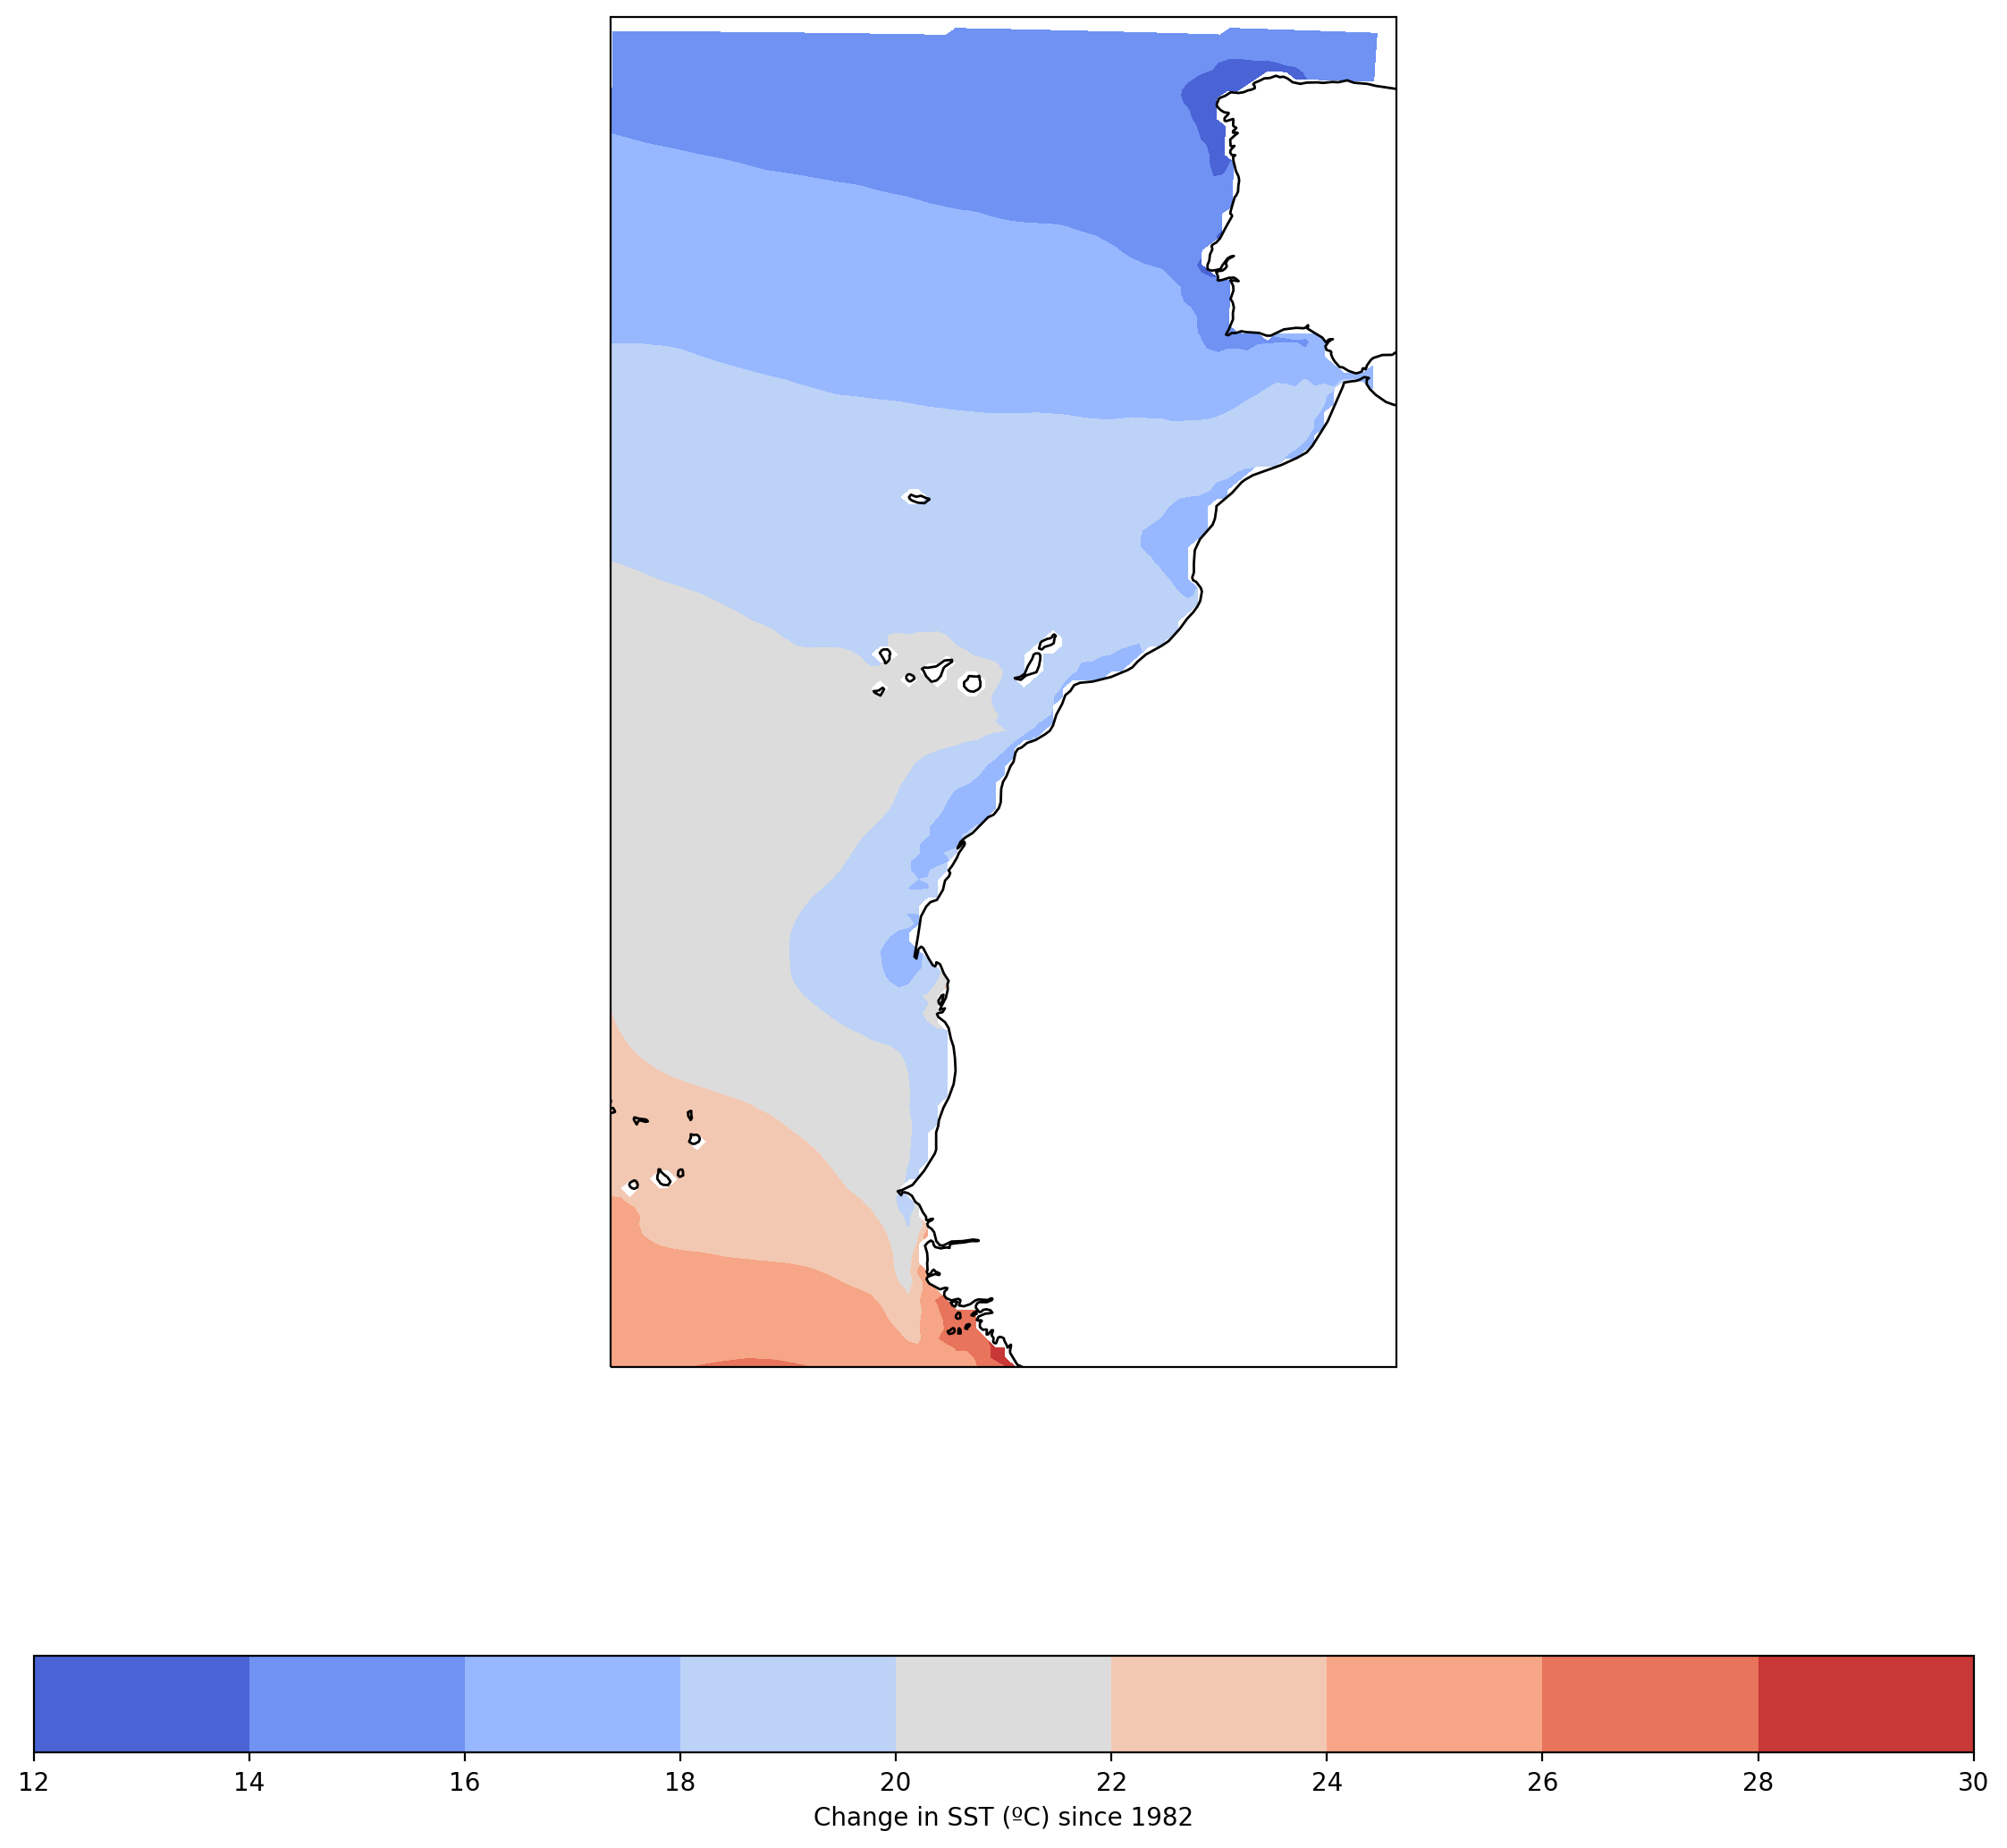

In [10]:
fig=plt.figure(figsize=(14,14))
ax = plt.axes(projection=crs.PlateCarree())
ax.coastlines()
cf=ax.contourf(Ca_ds.longitude,Ca_ds.latitude,
               Ca_ds.tos.mean('time'), cmap='coolwarm')
#plt.plot(Ca_ds.lon,Ca_ds.lat,'o')
fig.colorbar(cf,label='Change in SST (ºC) since 1982', extend='neither',orientation='horizontal');
#Grid de 25km de resolución regular no hace falta interpolar.

In [11]:
#Para guardar el .nc, el nombre del fichero sigue la plantilla de los metadatos
#dataset_id_template_ = variable_id_table_id_source_id_experiment_id_member_id_grid_label_YYYYMM-YYYYMM


FileIn=f'{path}CaCLME_{variable_id}_{table_id}_{source_id}_{experiment_id}_{member_id}.nc' 

FileIn

Ca_ds.to_netcdf(FileIn) # lon lat recortados